In [10]:
# INSTALL REQUIRED PACKAGES FOR PEPPER NOTEBOOK
import subprocess
import sys

def install_package(package):
    """Install a package using pip"""
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Fix scikit-learn compatibility issue first
print("🔧 Fixing scikit-learn compatibility...")
install_package("scikit-learn>=1.3.0")

# Install all required packages for Pepper
packages = [
    "chainlit>=1.3.2",
    "elevenlabs>=1.50.3", 
    "groq>=0.13.1",
    "langchain-community>=0.3.13",
    "langchain-groq>=0.2.2",
    "langchain>=0.3.13",
    "pydantic==2.10.0",
    "together>=1.3.10",
    "langgraph>=0.2.60",
    "langchain-openai>=0.2.14",
    "pydantic-settings>=2.7.0",
    "qdrant-client>=1.12.1",
    "sentence-transformers>=3.3.1",
    "python-dotenv"  # For loading .env files
]

print("Installing packages for Pepper notebook...")
for package in packages:
    try:
        install_package(package)
        print(f"✅ Installed: {package}")
    except Exception as e:
        print(f"❌ Failed to install {package}: {e}")

print("🎉 Installation complete!")
print("⚠️  IMPORTANT: Restart your Jupyter kernel now to avoid import conflicts!")

🔧 Fixing scikit-learn compatibility...
Installing packages for Pepper notebook...
✅ Installed: chainlit>=1.3.2
✅ Installed: elevenlabs>=1.50.3
✅ Installed: groq>=0.13.1
✅ Installed: langchain-community>=0.3.13
✅ Installed: langchain-groq>=0.2.2
✅ Installed: langchain>=0.3.13
✅ Installed: pydantic==2.10.0
✅ Installed: together>=1.3.10
✅ Installed: langgraph>=0.2.60
✅ Installed: langchain-openai>=0.2.14
✅ Installed: pydantic-settings>=2.7.0
✅ Installed: qdrant-client>=1.12.1
✅ Installed: sentence-transformers>=3.3.1
✅ Installed: python-dotenv
🎉 Installation complete!
⚠️  IMPORTANT: Restart your Jupyter kernel now to avoid import conflicts!


In [11]:
# PEPPER GRAPH VISUALIZATION SETUP (BYPASS MODE)
import sys
import os
from dotenv import load_dotenv
from unittest.mock import Mock

# Load environment variables from .env file (for settings.py)
load_dotenv('/Users/rishabhchopra/Documents/GitHub/pepper/ava-whatsapp-agent-course/.env')

# Navigate to the right directory for imports
sys.path.append('/Users/rishabhchopra/Documents/GitHub/pepper/ava-whatsapp-agent-course/src')

# # Mock problematic modules to avoid scikit-learn conflicts
# sys.modules['sentence_transformers'] = Mock()
# sys.modules['ai_companion.modules.memory.long_term.vector_store'] = Mock() 
# sys.modules['ai_companion.modules.memory.long_term.memory_manager'] = Mock()

# print("✅ Environment setup complete (bypass mode)!")
# print("⚠️  Memory components mocked for visualization only")

In [ ]:
"""
🏗️ pepper'S BRAIN BLUEPRINT - Where all the pieces connect to form her complete mind

WHAT IS THIS FILE?
This is the "architect's blueprint" that shows how Pepper's brain is wired. It connects:
- STATE (the clipboard) flows between all nodes
- NODES (the workers) do the actual work
- EDGES (the decision points) control the flow

THINK OF IT AS:
You're the city planner designing how traffic flows through a city:
- Nodes = Buildings where work happens (office, factory, restaurant)
- Edges = Traffic lights that decide which road to take next
- State = The delivery truck carrying packages between buildings

THE GRAPH BUILDING CONCEPT:
Think of this like building a subway system. We're laying down:
- FIXED TRACKS (add_edge): Everyone must follow this route
- DECISION JUNCTIONS (add_conditional_edge): Route depends on conditions

START and END are special LangGraph constants:
- START = "Message just arrived, begin processing"
- END = "Response sent, stop the workflow"

COMPLETE FLOW MAP (all possible routes):
                    START
                      ↓ (add_edge - everyone goes here first)
              memory_extraction_node
                      ↓ (add_edge - always next)
                  router_node 
                      ↓ (add_edge - always next)
             context_injection_node
                      ↓ (add_edge - always next)
             memory_injection_node
                      ↓ (add_conditional_edge - select_workflow decides)
            ┌─────────┼─────────┐
            ↓         ↓         ↓
    conversation_node  image_node  audio_node
            ↓         ↓         ↓ (add_conditional_edge - should_summarize decides)
            └─────────┼─────────┘
                   ↓ or ↓
        summarize_conversation_node  OR  END
                      ↓ (add_edge - always after summarize)
                     END

REAL EXAMPLES (3 different paths through the same graph):

EXAMPLE 1 - Text Response, Short Chat:
You: "How are you?" (5 messages total in chat)
Route: START → memory_extraction → router → context_injection → memory_injection 
       → conversation_node → END (no summarize needed)

EXAMPLE 2 - Image Response, Long Chat:  
You: "What are you up to?" (35 messages total in chat)
Route: START → memory_extraction → router → context_injection → memory_injection
       → image_node → summarize_conversation_node → END (too many messages!)

EXAMPLE 3 - Audio Response, Medium Chat:
You: "Can you call me back?" (20 messages total)
Route: START → memory_extraction → router → context_injection → memory_injection
       → audio_node → END (no summarize needed)
"""

# Python optimization: cache the graph so we don't rebuild it every time
from functools import lru_cache

# LangGraph core components
from langgraph.graph import END, START, StateGraph

# Our custom edge functions (the traffic controllers)
from ai_companion.graph.edges import (
    select_workflow,                # Routes to conversation/image/audio node
    should_summarize_conversation,  # Decides if chat needs compression
)
# Our custom node functions (the workers)
from ai_companion.graph.nodes import (
    audio_node,                    # Generates voice responses
    context_injection_node,        # Adds Pepper's current activity
    conversation_node,             # Generates text responses  
    image_node,                    # Generates image + caption
    memory_extraction_node,        # Stores facts about you
    memory_injection_node,         # Retrieves what Pepper remembers about you
    router_node,                   # Decides response type (text/image/audio/voice_call)
    summarize_conversation_node,   # Compresses long conversations
    voice_calling_node,            # NEW: Handles phone call requests
)
# The shared state (clipboard) that flows through all nodes
from ai_companion.graph.state import AICompanionState


# Cache result so graph is built only once (performance optimization)
@lru_cache(maxsize=1)  
def create_workflow_graph():
    """
    🧠 THE BRAIN CONSTRUCTOR - Builds Pepper's complete neural network
    
    WHAT IT DOES:
    Creates the "wiring diagram" for Pepper's brain by connecting nodes and edges.
    Like an electrician connecting all the circuits in a house.
    
    WHY CACHE IT?
    Building graphs is expensive. @lru_cache means "build once, reuse forever"
    until the server restarts. Much faster for multiple conversations.
    
    RETURN VALUE:
    A LangGraph StateGraph builder object (not the final graph yet).
    The actual graph gets compiled at the bottom: create_workflow_graph().compile()
    """
    
    # STEP 1: Create the graph builder with our state type
    # What is StateGraph? LangGraph's class for building node/edge workflows
    # What is AICompanionState? Our custom clipboard that holds all conversation data
    graph_builder = StateGraph(AICompanionState)

    # STEP 2: Register all the worker nodes
    # What is add_node? Tells the graph "this function exists and can be called"
    # Format: add_node("node_name", actual_function)
    # The string names are used in edges to reference these nodes
    
    # Memory management nodes
    # memory_extraction_node: 
    # - What it does: "Let me write down what you just told me"
    # - Real example: You say "I'm a developer" → stores "User is a software developer"
    # - Why it exists: So Pepper remembers facts about you for future conversations
    # graph_builder.add_node("memory_extraction_node", memory_extraction_node)   

    # memory_injection_node: 
    # - What it does: "What do I remember about this person?"
    # - Real example: Searches memories → "This user is a developer, likes pizza"
    # - Why it exists: Personalizes responses based on your history
    # graph_builder.add_node("memory_injection_node", memory_injection_node)     # Retrieve user memories

    # summarize_conversation_node: 
    # - What it does: "This chat is getting too long, let me compress it"
    # - Real example: "User discussed weather, work updates, weekend plans"
    # - Why it exists: Prevents hitting AI token limits in long conversations
    # graph_builder.add_node("summarize_conversation_node", summarize_conversation_node)  # Compress long chats
    
    
    # Router Node
    # - What it does: "How should I respond to this?"
    # - Real example: You ask "What are you up to?" → decides "I should send a picture"
    # - Why it exists: Makes Pepper autonomous - she chooses text/image/audio responses
    graph_builder.add_node("router_node", router_node)                        

    # context_injection_node 📅
    # - What it does: "What am I doing right now according to my schedule?"
    # - Real example: Checks time → "I'm coding Python at 2 PM"
    # - Why it exists: Makes Pepper feel human instead of saying "I'm just an AI"
    # graph_builder.add_node("context_injection_node", context_injection_node)   # Add Pepper's current activity
    
    # Response generation nodes
    graph_builder.add_node("conversation_node", conversation_node)             # Generate text responses
    graph_builder.add_node("image_node", image_node)                           # Generate image + caption
    graph_builder.add_node("audio_node", audio_node)                           # Generate voice responses
    graph_builder.add_node("voice_calling_node", voice_calling_node)           # NEW: Handle phone call requests

    # STEP 3: Define the execution flow (the "roads" between "cities")
    # Two types of connections:
    # 1. add_edge = Always go from A to B (no decision needed)
    # 2. add_conditional_edges = Use an edge function to decide where to go next
    
    # LINEAR FLOW (no branching, always follows this path):
    # START → memory_extraction → router → context_injection → memory_injection
    
    # # Entry point: every conversation starts by storing user's message
    # graph_builder.add_edge(START, "memory_extraction_node")
    
    # # Always extract memories, then decide response type
    # graph_builder.add_edge("memory_extraction_node", "router_node")
    
    # # Always add Pepper's activity context after routing decision
    # graph_builder.add_edge("router_node", "context_injection_node")
    
    # # Always retrieve user memories after context injection
    # graph_builder.add_edge("context_injection_node", "memory_injection_node")

    # BRANCHING FLOW (conditional edges that use decision functions):
    
    # BRANCH 1: Route to appropriate response generator
    # After memory_injection_node completes, call select_workflow() edge function
    # select_workflow() returns: "conversation_node" OR "image_node" OR "audio_node"
    # LangGraph automatically routes to whichever node the function returns
    # graph_builder.add_conditional_edges("memory_injection_node", select_workflow)

    # BRANCH 2: Check if conversation needs summarization
    # After ANY response node completes, check if chat is getting too long
    # should_summarize_conversation() returns: "summarize_conversation_node" OR END
    # If too many messages → compress chat, otherwise → end conversation
    graph_builder.add_conditional_edges("conversation_node", should_summarize_conversation)
    graph_builder.add_conditional_edges("image_node", should_summarize_conversation)  
    graph_builder.add_conditional_edges("audio_node", should_summarize_conversation)
    
    # NEW: Voice calling always ends conversation (call is initiated, WhatsApp message sent)
    # No summarization needed since voice_calling_node sends confirmation and ends WhatsApp flow
    graph_builder.add_edge("voice_calling_node", END)
    
    # Final cleanup: after summarization, always end
    graph_builder.add_edge("summarize_conversation_node", END)

    # STEP 4: Return the configured (but not yet compiled) graph
    return graph_builder


# STEP 5: Create the final executable graph
# What is compile()? Converts the blueprint into an actual runnable workflow
# What is "without checkpointer"? No conversation persistence between sessions
# This compiled graph is what gets imported and used by other parts of Pepper
graph = create_workflow_graph().compile()


/Users/rishabhchopra/Documents/GitHub/pepper/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


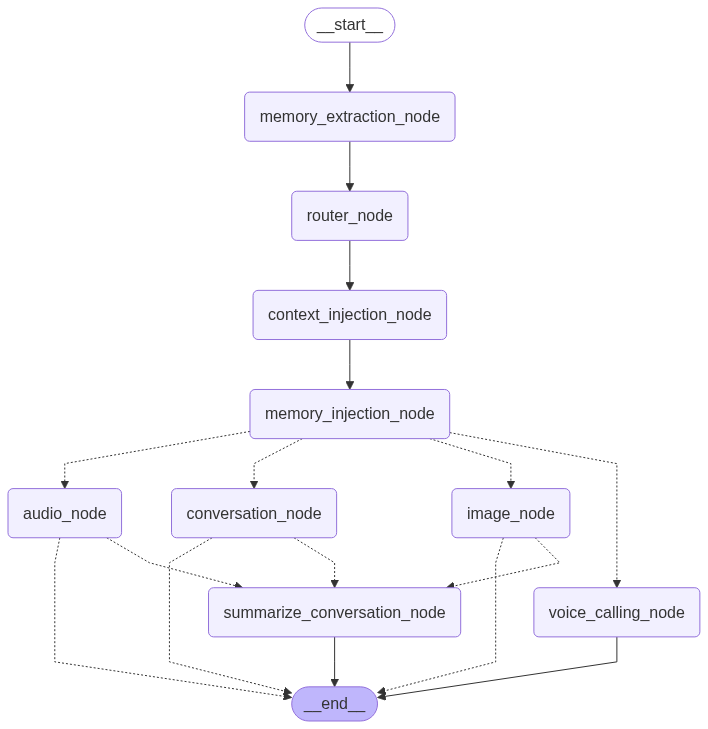

In [4]:
graph

In [ ]:
- START -> router_node 
- router_node -> 

In [20]:

# Python optimization: cache the graph so we don't rebuild it every time
from functools import lru_cache

# LangGraph core components
from langgraph.graph import END, START, StateGraph

# Our custom edge functions (the traffic controllers)
from ai_companion.graph.edges import (
    select_workflow,                # Routes to conversation/image/audio node
    should_summarize_conversation
)
# Our custom node functions (the workers)
from ai_companion.graph.nodes import (
    audio_node,                    # Generates voice responses
    conversation_node,             # Generates text responses  
    image_node,                    # Generates image + caption
    router_node,                   # Decides response type (text/image/audio/voice_call)
    voice_calling_node,            # NEW: Handles phone call requests
    summarize_conversation_node
)
# The shared state (clipboard) that flows through all nodes
from ai_companion.graph.state import AICompanionState


# Cache result so graph is built only once (performance optimization)
@lru_cache(maxsize=1)  
def create_workflow_graph():
    """
    🧠 THE BRAIN CONSTRUCTOR - Builds Pepper's complete neural network
    
    WHAT IT DOES:
    Creates the "wiring diagram" for Pepper's brain by connecting nodes and edges.
    Like an electrician connecting all the circuits in a house.
    
    WHY CACHE IT?
    Building graphs is expensive. @lru_cache means "build once, reuse forever"
    until the server restarts. Much faster for multiple conversations.
    
    RETURN VALUE:
    A LangGraph StateGraph builder object (not the final graph yet).
    The actual graph gets compiled at the bottom: create_workflow_graph().compile()
    """
    
    graph_builder = StateGraph(AICompanionState)
    graph_builder.add_node("router_node", router_node)     
                   

    graph_builder.add_node("conversation_node", conversation_node)             # Generate text responses
    graph_builder.add_node("image_node", image_node)                           # Generate image + caption
    graph_builder.add_node("audio_node", audio_node)                           # Generate voice responses
    graph_builder.add_node("voice_calling_node", voice_calling_node)   
    graph_builder.add_node("summarize_conversation_node", summarize_conversation_node)  # Compress long chats
    
    
    graph_builder.add_edge(START, "router_node")
    graph_builder.add_conditional_edges("router_node", select_workflow)
    graph_builder.add_conditional_edges("conversation_node", should_summarize_conversation)
    graph_builder.add_conditional_edges("image_node", should_summarize_conversation)  
    graph_builder.add_conditional_edges("audio_node", should_summarize_conversation)
    
    # NEW: Voice calling always ends conversation (call is initiated, WhatsApp message sent)
    # No summarization needed since voice_calling_node sends confirmation and ends WhatsApp flow
    graph_builder.add_edge("voice_calling_node", END)
    
    # Final cleanup: after summarization, always end
    graph_builder.add_edge("summarize_conversation_node", END)

    # STEP 4: Return the configured (but not yet compiled) graph
    return graph_builder


graph = create_workflow_graph().compile()


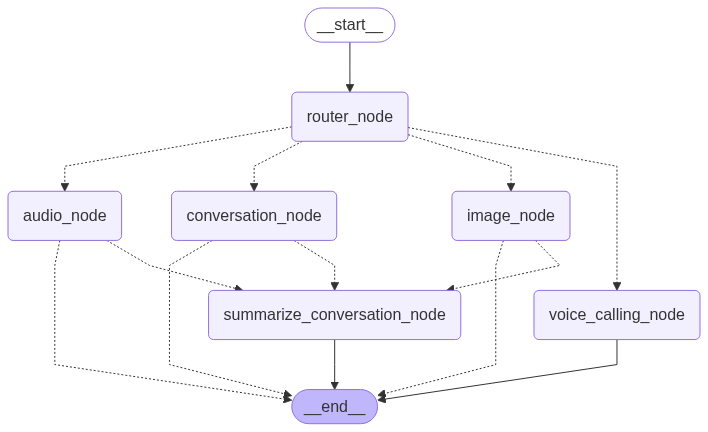

In [21]:
graph

In [9]:
  # 1. ✅ Test WhatsApp messaging still works (good foundation check)
  # 2. ✅ Fix model configuration FIRST ⭐ CRITICAL
  # 3. ✅ Switch to gpt-oss model + test built-in search as you planned)
  # 4. ✅ Create ReAct agent node structure validated by reference patterns)
  # 5. ✅ Create mock tools first (validated by agents-from-scratch approach)
  # 6. ✅ Make tool calling functions (patterns confirmed in reference)
  # 7. ✅ Test multi-step workflows (reference shows this works)
  # 8. Create Done tool for workflow completion (agents-from-scratch pattern)
  # 9. Implement Command objects for dynamic routing (reference shows these are critical)
  # 10. ✅ Update graph routing to include ReAct agent (architecture confirmed)
  # 11. ✅ Test end-to-end via WhatsApp (integration validated)
  # 12. ✅ Deploy and monitor (Railway setup already working)
